In [70]:
import control
import numpy as np
import matplotlib.pyplot as plt
import tellurium as tea
import sympy

In [5]:
s = control.TransferFunction.s

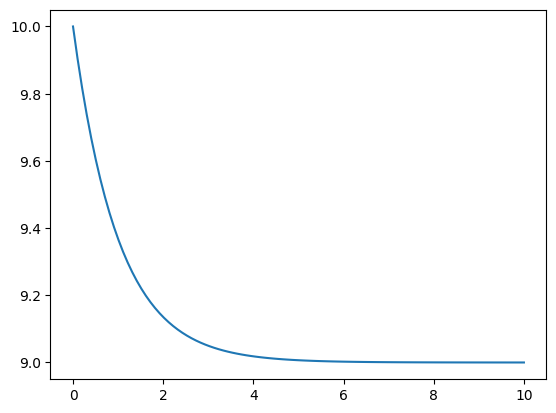

In [9]:
tf = -1/(1 + s)
times, predictions = control.forced_response(tf, T=np.linspace(0, 10, 100), U=1)
plt.plot(times, predictions+ 10)

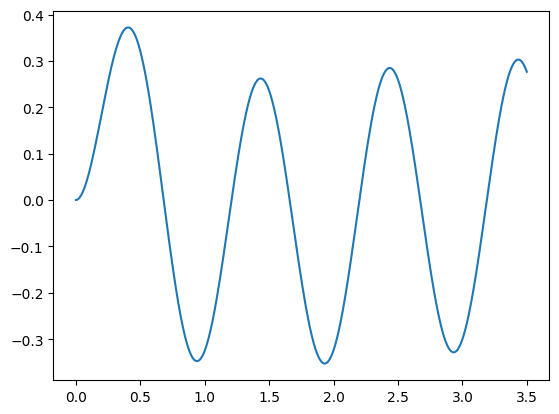

In [11]:
from scipy import signal as sig
import numpy as np


k = 12.8
num = [1]
den = [1, 2.65, 2]

Gs = sig.TransferFunction(np.dot(k, num), den)
t = np.linspace(0, 3.5, 600)
u = np.cos(2*np.pi*1.0*t)

tsim, ysim, xsim = sig.lsim2(Gs, U=u, T=t)
plt.plot(tsim, ysim)

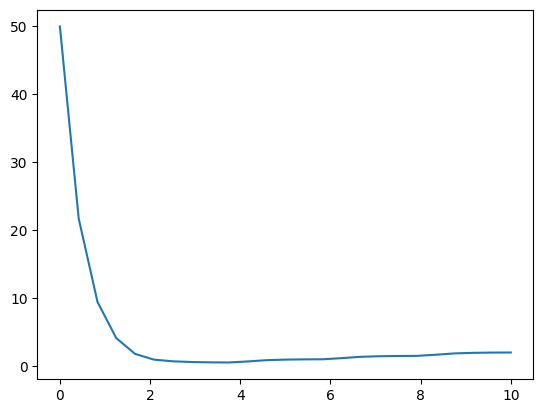

In [20]:
k = 12.8
num = [-1]
den = [1, 2]

Gs = sig.TransferFunction(np.dot(k, num), den)

u = []
[u.extend(np.repeat(n, 5)) for n in range(5)]
t = np.linspace(0, 10, len(u))

tsim, ysim, xsim = sig.lsim(Gs, U=u, T=t, X0=50)
plt.plot(tsim, xsim)

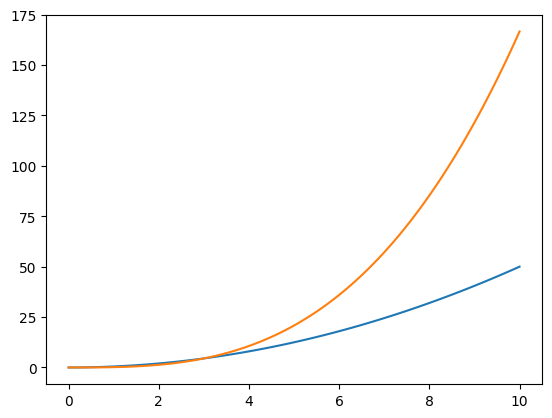

In [30]:
num = [-5, 10]
den = [1, 0, 0]
k = 1

Gs = sig.TransferFunction(np.dot(k, num), den)

u = []
[u.extend(np.repeat(n, 5)) for n in range(5)]
u = np.linspace(0, 10, 100)
t = np.linspace(0, 10, len(u))

tsim, ysim, xsim = sig.lsim(Gs, U=u, T=t, X0=0)
plt.plot(tsim, xsim)

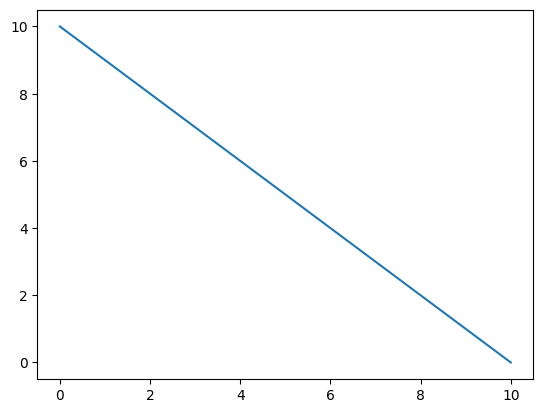

In [47]:
s = control.TransferFunction.s
tf = control.TransferFunction([-1], [1])

u = []
[u.extend(np.repeat(n, 5)) for n in range(5)]
u = np.linspace(0, 10, 100)
times = np.reshape(np.linspace(0, 10, len(u)), (len(u),))
result = control.forced_response(tf, U=u, T=times) 
y = np.reshape(result.y, (len(u), 1))

plt.plot(times, y+ 10)

In [35]:
np.shape(times), np.shape(result.y)


((100,), (1, 100))

# Simulate transfer function in roadrunner

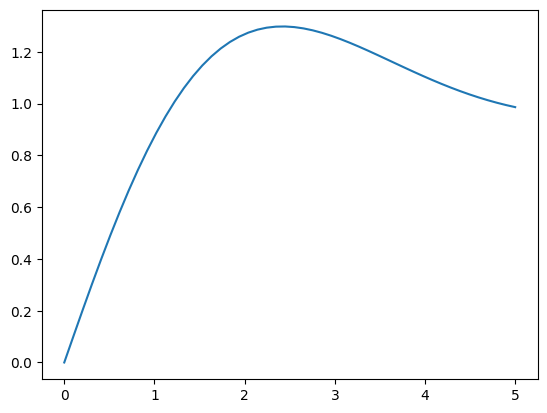

In [69]:
tf = control.TransferFunction([1, 1], [1, 1, 1])
times, y = control.step_response(tf, np.linspace(0, 5, 50))
plt.plot(times, y)

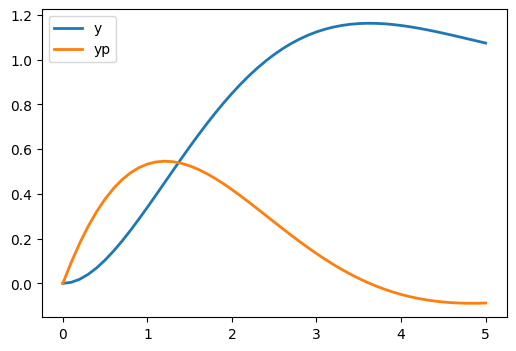

In [68]:
model = """
y = 0
yp = 0
ypp = 0
y' = yp
yp' = ypp
$u = 1
u' = up
up = 0
y = 0
ypp := u + up - y - yp
"""
rr = te.loada(model)
rr.simulate(selections=["time", "y", "yp"])
rr.plot()

In [71]:
v = sympy.symbols("v")

TransferFunction(array([1, 1]), array([1, 1, 1]))

In [74]:
expr = (v + 1)/(v**2 + v + 1)
expr.apart()

(v + 1)/(v**2 + v + 1)

In [75]:
tf.poles()

array([-0.5+0.8660254j, -0.5-0.8660254j])